<a href="https://colab.research.google.com/github/jgutier1/APP-MOVIL/blob/main/Gutierrez_Juan_Carlos_(KNN)_16_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Institución Universitaria Digital de Antioquia

# Ingeniería de Software y Datos

# Machine Learninig

# Profesora: Sharon Karin Camacho

# PREICA2501B010107

# S25 - EA2. K- Nearest Neighbors (KNN)

# Elaborado por: Juan Carlos Gutiérrez Riaño

# Fecha 16 Marzo de 2025


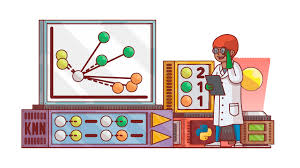

# **Actividad S25 - EA2. K- Nearest Neighbors (KNN)**

- Preparación de datos

- Algoritmo K-Nearest Neighbors (KNN) con la biblioteca scikit-learn.

- Métricas de evaluación

- Rendimiento de los modelos de clasificación

# **HIPOTESIS**
# **1) El valor de k muy pequeño o muy grande reduce la precisión del modelo**

# **2) El valor óptimo de k mejora la precisión del modelo**

# **3) El modelo se estabiliza después de cierto número de vecinos**

# **4)  Una La validación cruzada puedo Hacer una seleccion del  mejor  k**

# **5) Los datos no presentan  valores atípicos los cuales  afectan en la precisión**


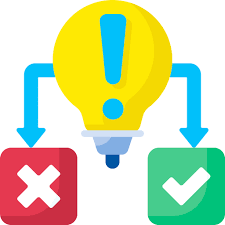

# **1. Carga de archivo en un DataFrame de pandas**

In [87]:
import pandas as pd


file_path = '/content/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

#  verifico filas para localizar Churn y otros
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
#listado de todas la variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **2. Estadisticas**

Resumen Estadístico
Comienza obteniendo un resumen estadístico de las características numéricas del conjunto de datos


media, la mediana y la desviación estándar

In [2]:
#Hago consultas media, mediana y desviación estándar

df.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Parece que los cargos mensuales varian mucho 18.25 dólares mientras que el máximo es 118.75 dólares

- 25% de clientes paga menos de 35.50 y  75% paga menos de 89.85 dólares

- El tiempo en parece que son meses y el máximo es 72 meses (6 años)

- Creo que seniorCitizen es muy baja en la media 16%. el minimo hasta 0 y el std 0.3



# **3. Clases Crurn**

Distribución de Clases
Visualiza la distribución de la variable objetivo, que es la columna Churn.

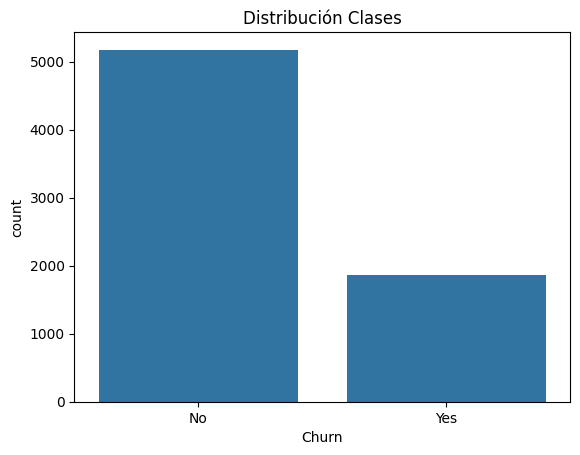

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# esta es la variable Churn
sns.countplot(x='Churn', data=df)
plt.title('Distribución Clases')
plt.show()

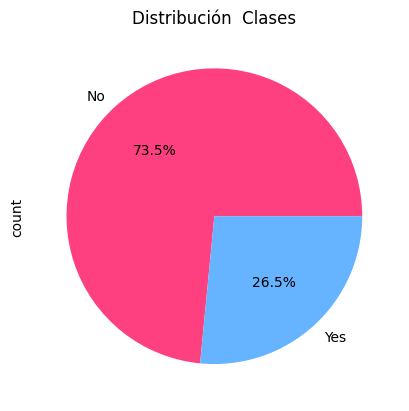

In [19]:
#grafico por porcentaje

df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FF4080', '#66B3FF'])
plt.title('Distribución  Clases')
plt.show()

# El 73% de los clientes permanecen y el 26.5 se van o retiran

# **4. Realizo consulta Analisis de la columna 'Contract' y 'Churn**
Análisis de Variables Categóricas en este caso **'Contract'**
Explorando algunas de las variables categóricas para entender su distribución y relación con la variable objetivo

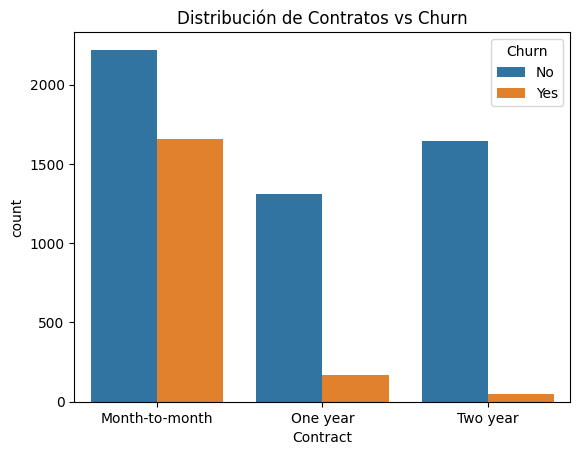

In [4]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contratos vs Churn')
plt.show()

- Los contratos se clasifican en mensuales ,anuales y bianuales

- los contratos mensuales son los mas altos osea que pueden tener mas rotacion o cancelar el servicio
- los contratos de uno o dos años son mas comprometidos



# **5. Corelacion de la Matriz para escoger la mas conveniente**

variable solo numericas
Correlación entre Variables Numéricas
Calcula y visualiza la matriz de correlación para identificar relaciones entre variables numéricas

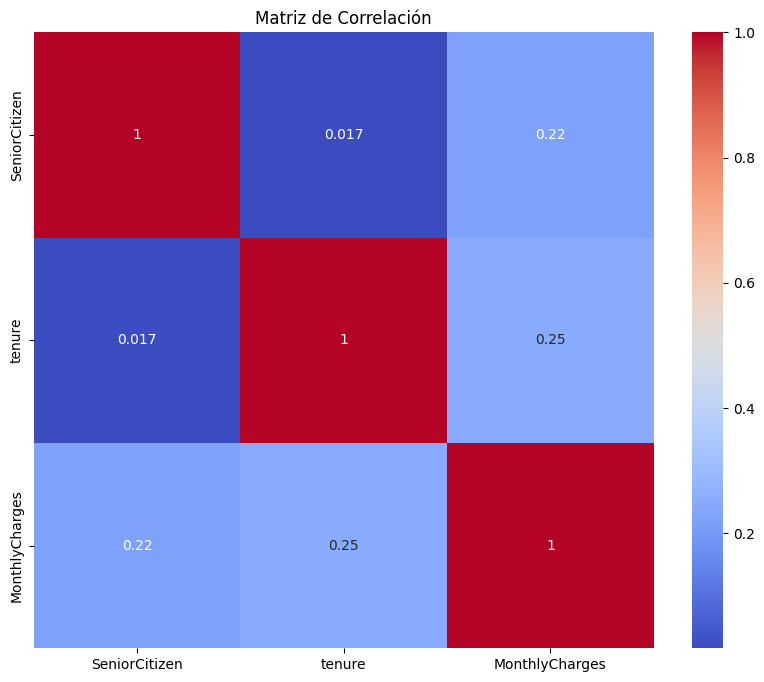

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

- se encontro que los valores de 1 son los de mas correlacion positiva o fuerte

- los valores que se acercan a 0 ninguna correlacion

- solo identificamos correlaciones para este trabajo como la variable   SeniorCitizen y MonthlyCharges

- Decido trabajar con **MonthlyCharges**


# **6. Histograma de Ingresos**

Crea un histograma de la variable income para visualizar su distribución.

# **consulta si existe una columna llamada 'income'**

In [6]:
if 'income' in df.columns:
    plt.hist(df['income'], bins=30, edgecolor='black')
    plt.title('Histograma de Ingresos')
    plt.xlabel('Income')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("No hay una columna llamada 'income' en el conjunto de datos.")

No hay una columna llamada 'income' en el conjunto de datos.


## **7. como no se encontro la variable 'income' se realizara la consulta con 'MonthlyCharges' (cargos mensuales ) previamente identificada**

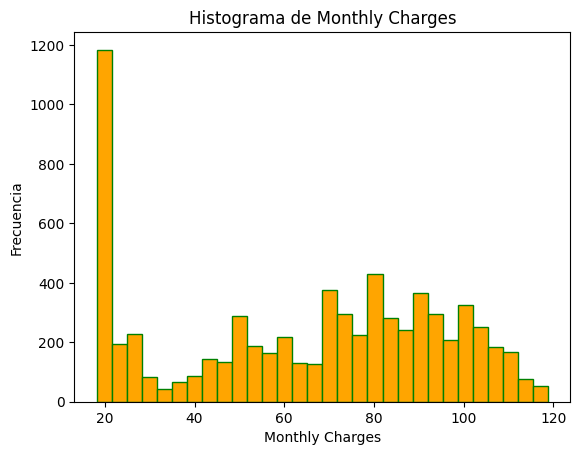

In [12]:
plt.hist(df['MonthlyCharges'], bins=30, color='orange', edgecolor='green')
plt.title('Histograma de Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frecuencia')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **8. Normalización de los Datos para KNN**

*Estandariza tus datos y justifica tu elección*

 - Tomo  K-Nearest Neighbors (KNN) y variables con escalas diferentes para ver las  desproporciones en el cálculo de distancias

 -  utilizo StandardScalerpara que todas las variables tengan  media de 0 y  desviación estándar de 1



In [22]:
from sklearn.preprocessing import StandardScaler

# solo columnas numéricas
numeric_columns = ['tenure', 'MonthlyCharges']

#  escalador
scaler = StandardScaler()

# Normalizacion datos
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# transformación
df_scaled.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,29.85,No
1,5575-GNVDE,Male,0,No,No,0.066327,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.259629,1889.5,No
2,3668-QPYBK,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,108.15,Yes
3,7795-CFOCW,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,1840.75,No
4,9237-HQITU,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,151.65,Yes


In [89]:
from sklearn.preprocessing import StandardScaler

#  escalador
scaler = StandardScaler()

# Normalizamos solo la columna 'MonthlyCharges'
df_scaled = df.copy()
df_scaled['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])

# resultado
df_scaled.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.259629,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,151.65,Yes


# **9. División de Datos en Entrenamiento y Prueba**

*Divide los datos en conjuntos de entrenamiento y prueba*

- la división en conjuntos de entrenamiento y prueba seran de (80%-20%) para  evaluar el rendimiento del modelo



In [90]:
from sklearn.model_selection import train_test_split

#  'MonthlyCharges' como característica y 'Churn' como variable objetivo
X = df_scaled[['MonthlyCharges']]
y = df['Churn']

# 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos tamaños y conjuntos
X_train.shape, X_test.shape

((5634, 1), (1409, 1))

- conjunto entrenamiento (5634, 1) con  5,634 filas y 1 colomna
- prueba (1409, 1) 1409 filar y 1 colomna

# **10. Implementación de KNN**

- Importo la biblioteca para implementar KNN

- Entreno el clasificador KNN

- Evalúacion de  la precisión del modelo junto a la  visualizacion de la precisión para un número diferente de vecinos

# **valor de k =5**

In [61]:
# KNeighborsClassifier , scikit-learn

from sklearn.neighbors import KNeighborsClassifier

In [78]:
# Entreno el clasificador KNN
# escojo el  número de vecinos puede ser de ( k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
#Evalúacion de la precisión del modelo junto a la visualizacion de la precisión para un número diferente de vecinos
from sklearn.metrics import accuracy_score

# Predicción y prueba
y_pred = knn.predict(X_test)

#  precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.70


# **11. Visualizalizo  precisión para  valores de k**

- identifico el valor que tengo de k

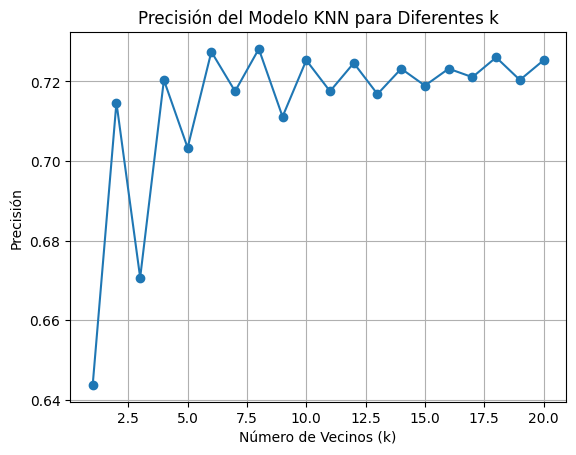

In [64]:

import matplotlib.pyplot as plt

#almaceno precisiones
accuracies = []

# valores de k (entre  1 a 20)
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Graficar  de la precisión planteada
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo KNN para Diferentes k')
plt.grid(True)
plt.show()

- se determina que la precision de K es 5 como valor adecuado

- se estabilizo un poco la precicion en aprox 0.72 con mas vecinos

- con el k pequeño tiende a sobrejustarce no captura patrones

- los rangos de k mas adecuados son k=7 y k=15 por lo que se aprecia



--------------------------------------------------------------------

-----------------------------------------------------------------------

# **12. Ensayo con k= 20**

# **se noto que el modelo mejora con mas vecinos**



- precicion del 73% con 20 vecinos

 - 7 de cada 10 predicciones fueron correctas y 3  errores.

- Al aumentar a k=20, reduce datos atípicos

**el modelo mejora con más vecinos**

In [69]:
# Entreno el clasificador KNN
# escojo el  número de vecinos puede ser de ( k=1020)
knn = KNeighborsClassifier(n_neighbors=20)

# Entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [76]:
#Evalúacion de la precisión del modelo junto a la visualizacion de la precisión para un número diferente de vecinos
from sklearn.metrics import accuracy_score

# Predicción y prueba
y_pred = knn.predict(X_test)

#  precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.73


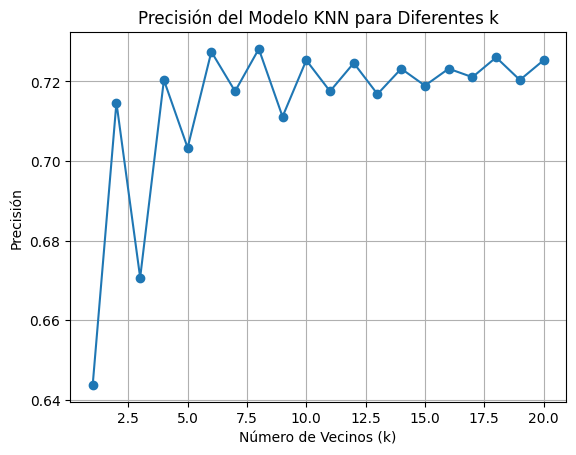

In [85]:
import matplotlib.pyplot as plt

#almaceno precisiones
accuracies = []

# valores de k (entre  1 a 20)
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Graficar  de la precisión planteada
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo KNN para Diferentes k')
plt.grid(True)
plt.show()

la grafica no cambia tanto son parecidas  de k=5 y k 20 debido al
que escogimos rango de 1  a 21

----------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------

# **13. Ensayo con k= 100**

# **se noto que el modelo NO mejora con mas vecinos**
- Se tiene perdida de detalle
- Perdida de patrones
-

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=100)

In [82]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [83]:
#Evalúacion de la precisión del modelo junto a la visualizacion de la precisión para un número diferente de vecinos
from sklearn.metrics import accuracy_score

# Predicción y prueba
y_pred = knn.predict(X_test)

#  precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.73


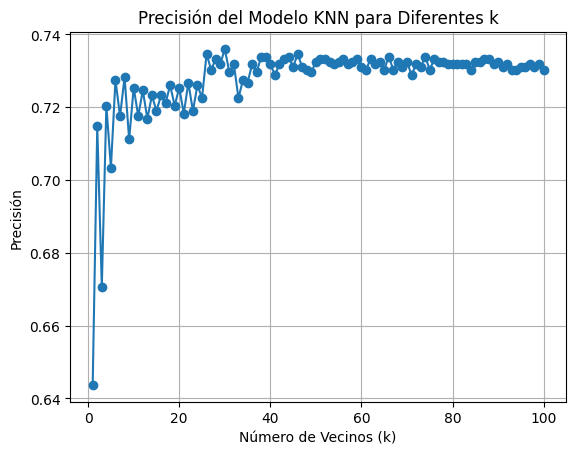

In [84]:
import matplotlib.pyplot as plt

#almaceno precisiones
accuracies = []

# valores de k (entre  1 a 20)
for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Graficar  de la precisión planteada
plt.plot(range(1, 101), accuracies, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo KNN para Diferentes k')
plt.grid(True)
plt.show()

- la precicion se vuelve inestable no mejora con k=100

- los valores de 30 a 40 parece estar estable
-

# **14. Validacion del k mas optimo**

- se realizan particiones cv =5
- prediccion de cada valor
- identifico el mejor k
# **El k óptimo es: 66 con una precisión de 0.7315**

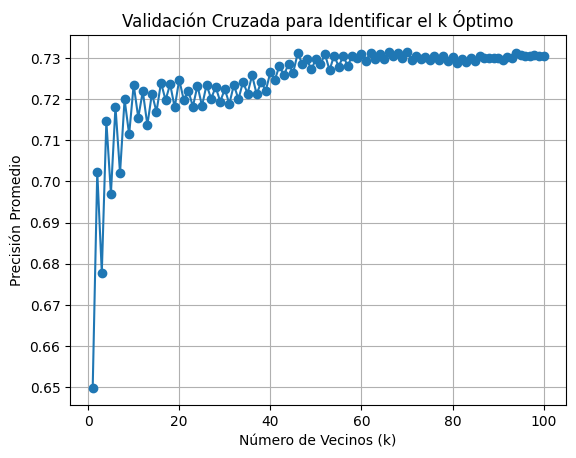

El k óptimo es: 66 con una precisión de 0.7315


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Lista para almacenar las precisiones promedio
k_range = range(1, 101)
accuracies = []

# Validación cruzada para cada valor de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())

# Gráfica de la precisión promedio
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión Promedio')
plt.title('Validación Cruzada para Identificar el k Óptimo')
plt.grid(True)
plt.show()

# Imprimir el k óptimo
optimal_k = k_range[np.argmax(accuracies)]
print(f'El k óptimo es: {optimal_k} con una precisión de {max(accuracies):.4f}')

# **RESPUESTA A LAS HIPOTESIS**


# **1. El valor de k muy pequeño o muy grande reduce la precisión del modelo**

la respuesta es verdad ya que si k es un valor muy pequeño genera sobre ajuste y si el k es muy grande satura el ajuste

# **2. El valor óptimo de k mejora la precisión del modelo**

Haciendo el sobre ajuste mejora la precision promedio mas indicada para el modelo esta hipotesis resulta ser cierta

# **3. El modelo se estabiliza después de cierto número de vecinos**

esta hipotesis es verdadera a partir de un valor de k se estabiliza por que entre 7.2  a 20 k la  precicion de aprox 0.72 se visualiza bien en la  grafica

# **4.  Una La validación cruzada puedo Hacer una seleccion del  mejor  k**

la particion de datos mejora la precicion esta hipotesis es verdadera

# **5. Los datos no presentan  valores atípicos los cuales  afectan en la precisión**

no esta definitiva la negatividad por que tendriamos que hacer deteccion de outliers

# **FIN DEL TRABAJO**